In [3]:
import matplotlib.pyplot as plt
import numpy as np

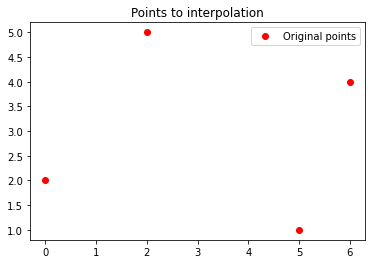

In [4]:
# We will interpolate these points
y = [2, 5, 1, 4]
x = [0, 2, 5, 6]
plt.title("Points to interpolation")
plt.plot(x, y, 'ro', label='Original points')
plt.legend()
plt.show()

## Matrix Lagrange Interpolation

This notebook demonstrates how to use the matrix Lagrange interpolation method to interpolate a polynomial function $f(x)$ for set of points $y_0, y_1, \ldots, y_n$ at certain positions $x_0, x_1, \ldots, x_n$. We will use the `x` and `y` points given above as an example. Here are the points written out as function of inputs and outputs:

$$
f(0) = 2 \newline 
f(2) = 5 \newline
f(5) = 1 \newline 
f(6) = 4 \newline 
$$

### Max Interpolated Polynomial Degree
We know that the maximum [degree](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) of the interpolated function follows this pattern.
- 2 points = linear interpolation (degree 1)
- 3 points = quadratic interpolation (degree 2)
- 4 points = cubic interpolation (degree 3)
- ...
- n points = n-1 degree interpolation


### Interpolating Example Points
Therefore for the given points, we will use a cubic interpolation.
The function will look like $f(x)$ below, where $a_i$ are coefficients of the polynomial:

$$
f(x) = a_0 + a_1x + a_2x^2 + a_3x^3
$$

Inputting the given points into the function, we get the following equations: 
$$
f(0) = 2 = a_0 + a_1(0) + a_2(0)^2 + a_3(0)^3 \newline
f(2) = 5 = a_0 + a_1(2) + a_2(2)^2 + a_3(2)^3 \newline
f(5) = 1 = a_0 + a_1(5) + a_2(5)^2 + a_3(5)^3 \newline
f(6) = 4 = a_0 + a_1(6) + a_2(6)^2 + a_3(6)^3 \newline
$$

This systems of equations can be written in matrix form as follows:

$$
\left[ {\begin{array}{cc}
  2 \\
  5 \\
  1 \\ 
  4 \\
\end{array} } \right]
=
\left[ {\begin{array}{cccc}
  1 & 0 & 0 & 0 \\
  1 & 2 & 4 & 8 \\
  1 & 5 & 25 & 125 \\
  1 & 6 & 36 & 216 \\
\end{array} } \right]
\left[ {\begin{array}{c}
  a_0 \\
  a_1 \\
  a_2 \\
  a_3 \\
\end{array} } \right]
$$

We can simplify the series of equations by completing the following steps:
- Replace the square matrix with the [Vandermonde Matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V(\bm{x})$ for the `x` points.
- Rename the column matrix containing $a_i$ elements $\bm{a}$.
- Rename the function output column matrix $\bm{y}$

Thus, the simplified equation is:
$$\bm{y}=V(\bm{x})\bm{a}$$

### Solving for $\bm{a}$
We can solve for $\bm{a}$ by using the [matrix inverse](https://en.wikipedia.org/wiki/Invertible_matrix) of the Vandermonde matrix $V(\bm{x})$. 
This yields the equation $\bm{a}=V(\bm{x})^{-1}\bm{y}$ which is trivial to solve. 
Otherwise we can just use the [numpy.linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) function.
Using either method we get the following coefficients for the polynomial function:     

$$
\bm{a} = \left[ {\begin{array}{c}
  0.28 \\
  -2.49 \\
  5.38 \\
  2.00 \\
\end{array} } \right]
$$

Therefore the interpolated function is:

$$
f(x) = 0.28 - 2.49x + 5.38x^2 + 2.00x^3
$$




Vandermonde Matrix = V(x) = 
 [[  0   0   0   1]
 [  8   4   2   1]
 [125  25   5   1]
 [216  36   6   1]]
a = 
 [ 0.275      -2.49166667  5.38333333  2.        ]


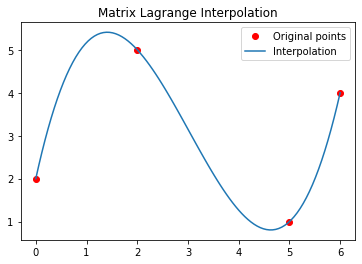

In [29]:
# Generate the Vandermonde matrix
V_x = np.vander(x, 4)
print("Vandermonde Matrix = V(x) = \n", V_x)

# We need to solve the system of equations
# y = V(x) * a 
a = np.linalg.solve(V_x, y)
print("a = \n", a)

x_new = np.linspace(0, 6, 100)
y_new = np.polyval(a, x_new)

plt.title("Polynomial Interpolation using the Lagrange method")
plt.plot(x, y, 'ro', label='Original points')
plt.plot(x_new, y_new, label='Interpolation')
plt.legend()
plt.show()